In [1]:
import pandas as pd
import numpy as np
import time
import ast

In [52]:
start = time.time()
df = pd.read_csv('./amazon_uk_shoes_products_dataset_2021_12.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6823 non-null   object 
 1   product_name       6823 non-null   object 
 2   reviewer_name      6823 non-null   object 
 3   review_title       6822 non-null   object 
 4   review_text        6814 non-null   object 
 5   review_rating      6823 non-null   float64
 6   verified_purchase  6823 non-null   bool   
 7   review_date        6823 non-null   object 
 8   helpful_count      1953 non-null   object 
 9   uniq_id            6823 non-null   object 
 10  scraped_at         6823 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 539.8+ KB


In [53]:
df.isnull()
df.isnull().sum()#결측치 확인

url                     0
product_name            0
reviewer_name           0
review_title            1
review_text             9
review_rating           0
verified_purchase       0
review_date             0
helpful_count        4870
uniq_id                 0
scraped_at              0
dtype: int64

In [54]:
df.drop(["helpful_count","uniq_id","scraped_at"], axis = 1, inplace=True) #helpful_count,uniq_id,scraped_at 제거
df = df.dropna(subset=['review_title', 'review_text'])#review_title, review_text의 결측치 제거
df.isnull().sum()#모든 결측치가 사라짐을 확인

url                  0
product_name         0
reviewer_name        0
review_title         0
review_text          0
review_rating        0
verified_purchase    0
review_date          0
dtype: int64

In [55]:
df.drop_duplicates() # 중복 데이터 제거


,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021
...,...,...,...,...,...,...,...,...
6818,https://www.amazon.co.uk/dp/B07TPYWFVN,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",mauti72,Schick und leicht,"Schicker Schuh, läuft sich gut.",5.0,True,Reviewed in Germany on 15 October 2020
6819,https://www.amazon.co.uk/dp/B07TPYWFVN,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",Charles Lechesnier,EXCELLENT,Mieux que je ne l'imaginais. Très bonne taille...,5.0,True,Reviewed in France on 23 August 2020
6820,https://www.amazon.co.uk/dp/B084WB2D93,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Rebecca Lützenkirchen,Einfach schöne Hausschuhe,Habe sie als Geschenk gekauft und sie sind seh...,5.0,True,Reviewed in Germany on 4 October 2021
6821,https://www.amazon.co.uk/dp/B084WB2D93,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Sergej Friedel,Langlebig.,Trage diese Hausschuhe fast zwei Monate jeden ...,5.0,True,Reviewed in Germany on 31 January 2021


In [42]:
print(df["product_name"].value_counts())

product_name
BMS Raincoat 100% Waterproof - Red with White Dots - 40L - Long Arms                                              10
Cole Haan Women's Grand Crosscourt Turf Sneaker, Optic White Leather, 7.5 UK                                      10
Reebok Kids Royal Cljog 2 Sneaker                                                                                 10
Element Men's Passiph Shoe Sneaker, Ceylon Yellow, 11 UK                                                          10
JENN ARDOR Womens Slip On Sneakers Perforated Flats Comfortable Walking Fashion Tennis Shoes Camo Size: 4.5 UK    10
                                                                                                                  ..
GANT Women's Raffiaville Sneaker, Off White, 3.5 UK                                                                1
GANT Women's Nicewill Sneaker, White, 7 UK                                                                         1
Bisgaard Unisex Kids fred Mid Calf Boot, Olive, 1 U

In [17]:
#감정분석에 필요한 어휘 ,프로그램을 다운로드
%pip install nltk
import nltk as nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기를 가져옮
nltk.download('vader_lexicon')
nltk.download('stopwords')


Note: you may need to restart the kernel to use updated packages.
['review_text']


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
start = time.time()
cache = set(stopwords.words("english"))
def remove_stopwords(review):
    text = " ".join([word for word in review.split() if word not in cache])
    return text
df.review_text = df.review_text.apply(remove_stopwords)#리뷰 텍스트 열에서 불용어 제

In [22]:
from nltk.tokenize import word_tokenize #리뷰글들의 불용어를 확인하기 위해 review_text를 토큰화
nltk.download('punkt')
tokens = word_tokenize("review_text")
tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
print(tokens)

['review_text']


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
# 리뷰인 경우 감정을 계산.
vader_sentiment = SentimentIntensityAnalyzer() # VADER 감정 분석기를 초기화
vader_sentiment.polarity_scores("review_text")["compound"]  # 리뷰가 텍스트임으로  VADER 감정 분석기를 사용하여 감정 점수 계산

In [58]:
print("Calculating sentiment columns for review_text")#review_text에 대한 감정 계산
start = time.time()
df["review_text_Sentiment"] = df.review_text.apply(calc_sentiment)#review_text에 대한 감정 계산 시간 측정
end = time.time()
print("Calculating sentiment took " + str(round(end - start, 2)) + " seconds")
#감정 계산에 1.83초 소요

Calculating sentiment columns for review_text
Calculating sentiment took 1.83 seconds


In [16]:
# 결과를 인쇄하고 감정이 리뷰와 일치하는지 확인합니다.
df = df.sort_values(by=["review_text_Sentiment"], ascending=True)
print(df[["review_text_Sentiment"]])
#-1에 가까울수록 부정적인 감정을 나타냅니다.
#1에 가까울수록 긍정적인 감정을 나타냅니다.

      review_text_Sentiment
2103                -0.9955
5328                -0.9930
5773                -0.9917
5772                -0.9917
2080                -0.9914
...                     ...
5427                 0.9949
5197                 0.9956
1335                 0.9963
3298                 0.9964
5041                 0.9971

[6813 rows x 1 columns]


In [41]:
start = time.time()
no_negative_reviews = df.apply(lambda x: True if x['review_text'] == "No Negative" else False , axis=1)
print("Number of No Negative reviews: " + str(len(no_negative_reviews[no_negative_reviews == True].index)))
both_no_reviews = df.apply(lambda x: True if x['review_text'] == "No Negative" and x['Positive_Review'] == "No Positive" else False , axis=1)
print("Number of both No Negative and No Positive reviews: " + str(len(both_no_reviews[both_no_reviews == True].index)))
end = time.time()
print("Lambdas took " + str(round(end - start, 2)) + " seconds")

Number of No Negative reviews: 0
Number of both No Negative and No Positive reviews: 0
Lambdas took 0.08 seconds


In [23]:
print("The shape of the data (rows, cols) is " + str(df.shape))

The shape of the data (rows, cols) is (6813, 11)


In [28]:
#신발은 몇종류가 있는가? --> 1086
shoes_freq = df["product_name"].value_counts()
print("There are " + str(shoes_freq.size) + " shoes")
print(shoes_freq) 

There are 1086 shoes
product_name
BMS Raincoat 100% Waterproof - Red with White Dots - 40L - Long Arms                                              10
Cole Haan Women's Grand Crosscourt Turf Sneaker, Optic White Leather, 7.5 UK                                      10
Reebok Kids Royal Cljog 2 Sneaker                                                                                 10
Element Men's Passiph Shoe Sneaker, Ceylon Yellow, 11 UK                                                          10
JENN ARDOR Womens Slip On Sneakers Perforated Flats Comfortable Walking Fashion Tennis Shoes Camo Size: 4.5 UK    10
                                                                                                                  ..
GANT Women's Raffiaville Sneaker, Off White, 3.5 UK                                                                1
GANT Women's Nicewill Sneaker, White, 7 UK                                                                         1
Bisgaard Unisex Kids fred Mid 

In [35]:
#5점을 받은 신발은 어느것이 있는가?
rating_5 = df[df['review_rating'] == 5.0]
num_5=len(rating_5)
print(num_5)

4250


In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

In [66]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [79]:
y_binary = (y == 0).astype(int)

In [88]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


In [82]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000


In [89]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
# F1 점수 계산
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1:.4f}')

# ROC-AUC 계산 (다중 클래스의 경우 'ovr' 옵션 사용)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.4f}')


F1 Score: 1.0000
ROC-AUC: 1.0000


In [90]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported

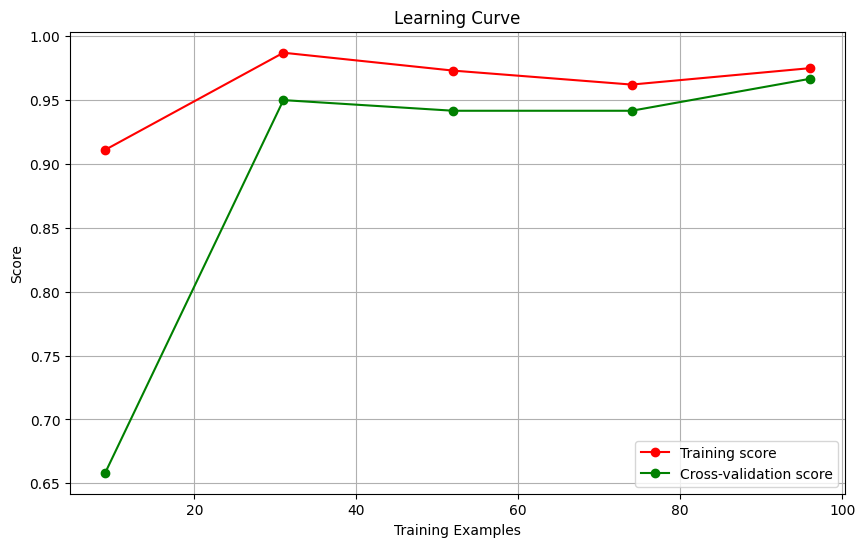

In [93]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()